For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week7-intro-spacy

# Natural Language Processing with spaCy

This Notebook is divided into three sections: 

__Section 1__ introduces spaCy

__Section 2__ demonstrates spaCy on sentences from the Hansard Parliamentary debates that are tagged with the speaker "Gladstone." 

__Section 3__ describes your assignment. 

# Section 1: Introduction to spaCy

spaCy is a comprehensive, industrial-grade software library for natural language processing (NLP). It provides tools to extract language patterns. 

spaCy's NLP pipeline is shown below. Provided with text, spaCy can tokenize, tag, parse, perform named entity recognition (ner), and more. spaCy returnes a __Doc__ object. We will talk more about __Doc__ objects later in this Notebook.

<img src="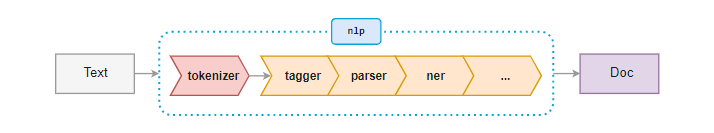
">

## A Break-Down of spaCy's Features

### Tokenizer

Tokenization is the process of splitting texts into meaningful segments, like n-grams (where n stands for any number).

To understand this concept, consider the following example:

In [1]:
example_sentence = 'The tenants themselves had made all these improvements, and they were paying now 18 3 d, upon their own improvements'

By default, textual data is often read as one, single unit. Python interprets `example_sentence` as a single unit (a character string) that makes no distinction between the individual words.

In [2]:
print(example_sentence)

The tenants themselves had made all these improvements, and they were paying now 18 3 d, upon their own improvements


In [3]:
type(example_sentence)

str

For some forms of measurement we may want the computer to make distinctions between words. We can do this through tokenization, or the process of splitting a unit of text into segments. 

1-grams (often just called "tokens") are a representation of the text split into single words:

<blockquote>"The", "tenants", "themselves", "had", "made", "all", "these", "improvements", ",", "and", "they", "were", "paying", "now", "18", "3", "d", "," "upon", "their", "own", "improvements"</blockquote>

bigrams are a representation of the text split into two words: 

<blockquote>"The tenants", "themselves had", "made all", "these improvements", ", and", "they were", "paying now", "18 3", "d ," "upon their", "own improvements"</blockquote>

During extraction, we may want to capture every permutation of the n-grams in a sentence. This is how extracting every permutation of bigrams might look:

<blockquote>"The tenants", "tenants themselves", "themselves had", "had made", "made all", "all these", "these improvements" ...</blockquote>

11-grams are a representation of the text split into segments 11 words long:

<blockquote>"The tenants themselves had made all these improvements, and they", "were paying now 18 3 d, upon their own improvements"</blockquote>

spaCy has tokenization support for over 59 languages.


### Parser

spaCy parses words using a statistical model to determine the word's grammatical role in a sentence. The process of parsing includes determining word's lexical functions, such as the word's part-of-speech and its syntactic relations.

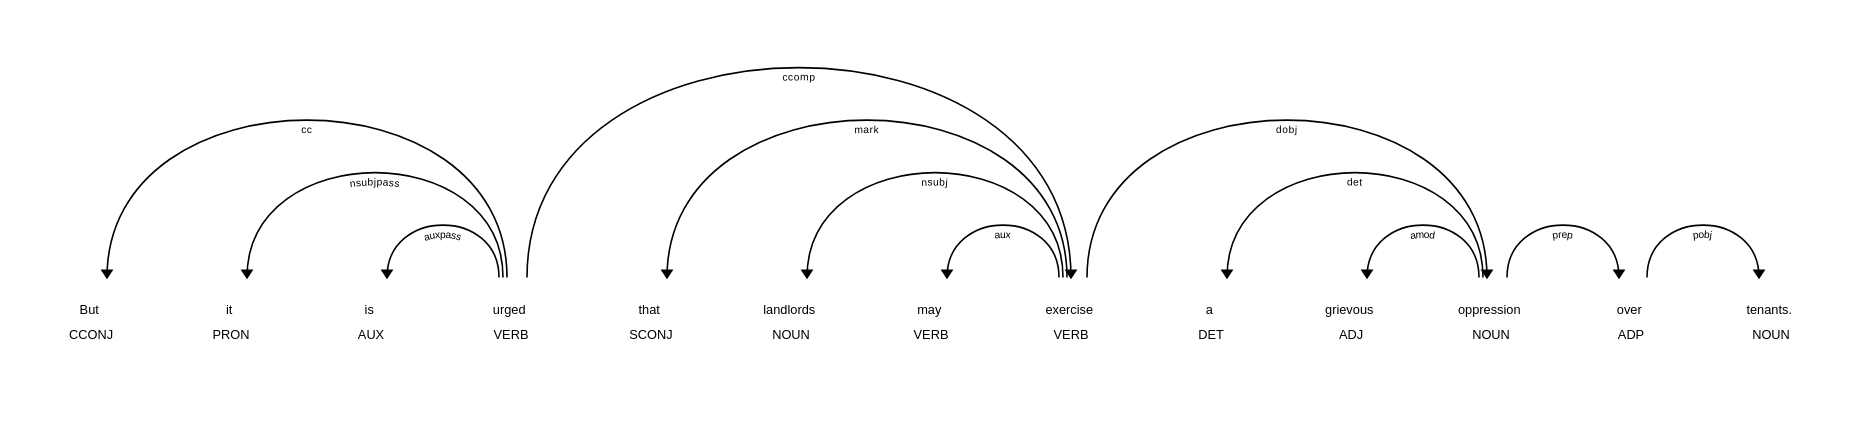

### Lemmatizer

While parsing text, spaCy can also lemmatize words. Lemmatization is the process of transforming a word to its base form from its inflectional form.

The lemma of "rents" is "rent." The lemma of "urged" is "urge." The lemma of "is" is "be." 

spaCy understands how to lemmatize words using "rule-based morphology." Morphology refers to word form and how different forms relate to other words in a sentence. Consider the transformation of the verb "write" in the following sentences:

<blockquote>"I write programs."</blockquote>
<blockquote>"I am writing a program."</blockquote>
<blockquote>"I have written a program."</blockquote>

The verb in the first sentence is in its base form, "write." The verbs in the second and third sentences are in an inflectional form, "writting" and "written." It is important to note that inflectional forms do not change a word's part-of-speech. 

Lemmatizing words before measuring them can streamline our results so words like "rent" and "rented" are not counted separately.

### Tagger

Tagging is the process of associating words with the attributes that were assigned to them while parsing. You can think of spaCy adding labels to each word in a sentence.

<img src="data:image/png;base64,
   iVBORw0KGgoAAAANSUhEUgAAA08AAAFxCAIAAAAkswS5AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAAhdEVYdENyZWF0aW9uIFRpbWUAMjAyMTowMToxOCAxMzo1NzoyNreYl9gAACufSURBVHhe7d0xbNroH/9x+Dco6BIdqBm65TJAh6q9X2aiXmZSJerUrboNxmTp1rFblzAmW//dOlWtCnMuCnN7qToUhlymf4dE8Sk5EYWK/2PzAIbYxmAb7If3S5HOkMQ2X5zyued5/DzxVqsVAwAAgKL+j/wvAAAAVETaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJXFW62W3AQAwMHp1drBZVXfShTW7+4tG08CCD3a9gAALjWNqCfcfNWachNA6JH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAZl39VIu//WF8nZdO5ZPwIlQlJe0BADDztJ9yI3bzTW7AmzCVlLQHAACgMtIeAACAykh7AAAAKiPtAQAAqIyV0wAA7pxq8YNGezO3unT0aK69bad+evX6y/XXi5vOChyxWDqRS8+//H0hn5JPWOsu0ZZeLG8u5NtPas3K3/++OunuLZFbEbuaz6cGT6OuNT79/d+77k+mE4WVX148SmbaDy1N/ogdokqf/mm+u/hZvbiRTwlGoZ79Nr+9PKTIMe2q+Nfl/oW+mVtZfPN4wc1BOxrFt9q+3Hbi/Hb7/EbHmpXjq1cnjarxooRcOvnsfwtPlucCr6cP5+NPSX1H2gMAuOM67dVPtT8PGr3P/ltELnGKAr0DJcvPU3nxcXv478aJ6cPbpC/iaI3S3//tWP9korD+657dh/3kj+h4iJ50cveP1LZ9Zqofn2c/d3eS2N266/DDg7SrtQ/thY+HsHu7/X+jj//d6L2cfulk+Y+UfXz0o57ez8dzSQNCTy4AwE+Vw/OsYwIQqieXGx/OS5p86KhZ+njm8CkudpU9ND6h9Q9azSZ4CTf7B2dFV9OeTeKIlUOnQ/RcNHYcC1Uzt2DFbr65Kqk/Anmj7aKVcNHY+KBV5INBftXTxNP5hA1tewAAd1y07Q00NeVWfnnzezIj2z+a9dPr119kt6MuvVjbtOp5NB8oHev2oOkNMyvz91Ox7/8MNqcVVpJfT3rJI7ey+Oy3O/djP99/ud7v69ELyRH1JLHT1zM4/6TbQaw1Pw0cbiXVepyU2/08te0JWrNu/Ld22mvEKqwvvejfSeZ253Wwb7TeFf5U7E27Nneh6qxL4VM9fTmfcUsaKNIeAMCdoWmvrxvLLnk0jWYY+cB6P6YDddzqFbXrMrvVv1Y/1bKmvRXW7+0ty+2eiR+xcvhj4yJR+N+vL+yGo/Wdkn2M8zRur8ec3qxLZDbJN7p/P3aH86ee/p2PMFpJA0ZPLgDAH5W/e2GosG6TTmJz+cepgtyOVT9fuegL0z9QBwfApRberCbkdpfehjQ4lCqznCqvyG3hq9aUW04CP2L+8b3Wpn4I23DWtxP7LtrUwt7mvdZz/eto3Kg3qom+0fp+lnbT8oEoxbvTIOvZZ/zzCRvSHgDAD9rVq26DR3rxhVNLRvJp73P35/chn7u2bSeZR790w4TOrrtQRIHfen1t1Yuhn82TP6K1bLoXLt2F1ImY+BstAtaTlV4pJlXPwM9nkkh7AAA/aM1ue09uZd65kckUhoY0jeRWf7X5xBXmHvSaWBK7f9i3bKXmcnIrFrv42R5WZWfyR7STSd2RW6EyhTc6llme79VzXCPVcwLnM0mkPQCADyr/9AY8PZzQCPS5+73s5Sh156Hc8mjyRwydabzR8Iq0BwDw2f7Bj/hbxy/TWPhIdIQFqVk/vSodamsfz9fsqxRO03mjh7SVTrye47bdThJpDwDgXfO7eVoKuNKsHJ7H355lDy539Hk9TGtRhFeY3+go1nNCSHsAgClK7P7eP13ZjNCu1t66mxBYEQG/0TNXz9GQ9gAAPiusyzlBXHzZ3faotkaxb+q+RG5lsby1VBsoznrYc3Bo3mhF6hkc0h4AwDvXty9An3f3P9PC+cny1t2jxwv5lP1ccSESxjc6yvWcENIeAMAHIZ0cLpTMi9sW1m+trB9uIXyjI13PySDtAQB8YJ6BrHpyHf67FKfHfKND4kH4oolzhgvfGx32egpTj8WkPQBQX3cSCvk4CKn5Z90+vovLP49p3vOoWfoynRlYhkyVEtU3emr1FKY+zRBpDwAUZw55QQa+/uWkPp8VndZOaFaONX06tMOwTykXAPPQt5udv60qoDVKH8923Mx1ojWKH2WUXzu8GrulrW+diZNrxzVtw/ZG+1pP/4xS0sCR9gBAZcG25/XLPPrVtFp8bP/gLP7xvHjcqGjNuvxqVI6vih/1SdE2Pjdmdjo08yq6sRNt7bBR764hqxnx6IPmMprUT//b7/xk9eT6k6vF/q0sz5uWAG5stN+400bpUJ+jeK2/AS9sb7SP9fTTKCUNGmkPANTUbu+RDyZkbntzyZwDYhc3+5+1jQ9nWfmlbXy+3DeNqc+lZ3LpreVUeUVuCtUTLftBts/FP5jiUTpZMBfTivkGhVjs5tvYaS+WfGo6JfnGHWg7J5ZzFIfsjfavnr4aqaTBIu0BgILscl7r+T25FRQ9B5RXk8PXjE8nCutLR49mdKHV/OOlsqk/9LbcSqq2ufBAPrJlvkPW4z0K4pT6AtwQ4Xqj/aqnv0YsaYBIewCgmsCi3lznoz3huBz+XP5R6uj5Um19sZBO5Po+7cTDZGE1Vdu619q8u7dst5PugWIPneNLL+vcuS83rD3onkbaNJqqZwpHzD++29pK7a70lSgnspFRn6PHyUws1h2RZndWmeX5bntVbmX+iac7UvUAV1tPinOQTwjG+byxzmoTfKNTdx7KLfEy71hNpOdLPX08n7ZRSxqUeKvVkpsAgOibXqsegJAi7QGAIsh5ACzRkwsAKiDqAbBD2gOAyCPqAXBA2gOAaCPqAXDGuD0AiCpyHgA3aNsDgEgi6gFwibQHANFD1APgHmkPACKGqAdgJIzbA4DIIOcBGANtewAQDUQ9AOMh7QFABBD1AIyNtAcAYUfUA+AF4/YAILzIeQC8o20PAEKKqAfAF6Q9AAgjoh4Av5D2ACB0iHoAfMS4PQAIEbucJxD1AIyHtAcAYUGTHoAg0JMLAKFA1AMQENIeAEwfUQ9AcOjJBYBpYqAegKCR9gBgamjSAzAB9OQCwHQQ9QBMBmkPAKaAqAdgYujJBYCJYqAegAkj7QHA5NCkB2Dy6MkFgAkh6gGYCtIeAEwCUQ/AtJD2ACBwRD0AU8S4PQAIEDkPwNTRtgcAQSHqAQgD0h4ABIKoByAkSHsA4D+iHoDwYNweAPiJnAcgbGjbAwDfEPUAhBBpDwD8QdQDEE6kPQDwAVEPQGhFb9xePB6XWwAiQu3xweQ8ACFH2x4AjI+oByD8SHsAMCaiHoBIIO0BwDiIegCignF7AAKn2Lg9ch6AaIl82lN79DcQUQr/nRL1AEQOPbkA4BZRD0AUkfYAwBWiHoCIoicXgP8U+zsl5wGINNr2AMAJUQ9A1JH2AMAWUQ+AAkh7AGCNqAdADYzbA+C/qP+d2uU8gagHIHJIewD8F+m/U5r0ACiGnlwA6CHqAVAPaQ8AJKIeACXRkwvAf5H7O2WgHgCFkfYA+C9af6c06QFQGz25AGYaUQ+A8kh7AGYXUQ/ALKAnF4D/wv93ykA9ALODtAfAfyH/O6VJD8BMoScXwGwh6gGYNTOU9uqV4tpa3GxtrVipy+8CYcBVGjSiHoAZNDs9uZVifGNfbpsUyq29vNwGpkydq3Tcv9NgEfUAzCZ6cgGoT+Q8y6gnch5RD4DySHsAFEeTHoAZR9oDoDKiHgCQ9gAoi6gHAAJpD4CCGKgHAF2kPQCqoUkPAMxIewCUQtQDgAGkPQDqIOoBwG2kPQAqYKAeANgh7U1EvV6plIrFNcFYDctEf65YLJUq9Skuj1WvlEq3zq53ZvKnAiPKI45vnIBlfaZeoCnXJzimystX1SFfXWWq16V7NOkBgJNW1Mjz7pDP9qnt5uR3fZHbrckdj6xW3i2MdC65wm557KN11MqDB80VyvJ7A9yeYE7swfN5DaiNXB3BjxMJR32mepWK2hdyIxx/9OtS/mKHfDYYsf/7/yy/5LcBYOapmPbKBfk939hlAQfjJJku8dnqIdFYxojbYeB25hnKp8jnqTYGT6E4HPWZ2lXqofqjXJfyVzrkswEYSHjdL/ltAECrpWBPbv37V7nlm6/fR+rNqleKa9mNnf2qfDyy6v5ONr4WYBdhvbQWz26MfILV/Y3sWsnDWdUrpaJ+ZA+1MYgCeTwTZ8HXZ0pXqbcrU78uA6z6qBioBwAuMW7PZ+2k5zHMGKoBBRpxhvHsztgnWB37A99rBh6kn0mxIh/4Z2r1CZx4Yd6vzOq3mtyaLgbqAYB7Cqa9zP2Hcss3D+9n5JYzERT8SXodvkeHeknPovLBuMRZjZyyxIF9rUxbdX/D37w3sfpM/Co13gC57cmIDd2BIOoBwEhUbNvLP/V5SFThaV5uOTKinty2kDMGm9X6Bj6Jh+Uhw6jGiVY29Cjj1GiVa5OPHI2asuqf3jlHvVxBVEcQFekSD3eHjjHzMe9NtD6TvUrrpT/tX5nFhdm9Mscc4Rckoh4AjEz+4x4d8rw75LO3GHHBzGZUfKEvX1iROxzC6Q5LN/cUON8TMNJtIjZ3IezapQvL0xs+ln+km0Dt7kkw7mUdvh/n6ox403SI6iMvsZ6ArlLbW0Jyw6/Mwft3XV6L8qc75LPeDNyH0f2S3wYA2FA27d1i+zkqv++JQ9Yb5TZW+92MEmicgueAIR/2ItI47WqE2t2uvruYZ2KXhITR4l4Y69MRyFVq94JHLFs7cbv9pfYhuuSzHgwkvO6X/DYAwB53afih8tqmm0x8Su/l3Y3502W2j2w+7qs7r/3qr+zQP7aPth3PLpPfPnLIRvvvXZ9T9kFvL+22siNRGPeVETL5Pbtzqb775P9YsonWJ0g2vei53Tfbo7wBov5H4l+Mo5F+yS/03gKAF6Q97ypF6+F6Ii7suRrwZ2YbafZf+Xi7ht6w5vJjO7P9xjbPuI8zme2XesuQEfSO9pwzlD19L3Kzn99xb+L1CVLtm2XYe/ZkGrFtHEQ9APCItOdZ5b1N1hut6aTLLtL4lmhElNEb1uSj4Wwz1kj3ZxotQ+MHPcnu3gY/5wWZTn0CYzOzn9v7zKdK5DyiHgB4R9rzqF56ZRn2Ci/H7/HKv7BsLfIn7hlRRm67ZXNC/oYsd+zinm+5KuL1cSv3ICu3Qssh5xH1AGAkpD1v7GYWcTlpi43Mk2fBxL2xOpcFmxOaRuOVeQSg7xSoj0vhzaFtNOkBgI9Ie54EE/ZEerCee9fjR3ShPPYQe7vJgEMTGvw4ETXrY3NqIbmFxBJRDwD8RdrzxHoAvOewZ9uC5aWpKLf7wsNZBdqkNooAFqFoU6Q+t9mcmt/LkPiCgXoAEATSnhd2N2h4HxMVTOOeB3YhK7RdlRMW4vrY5uP9jXCt6MtAPQAICGnPA5u7HaNxuyNmhv0ibfo6zMVSJQyRjyY9AAgOac8Dm37cIG93pCkNo7O9Z1io7u9sTD3yEfUAIFCkvfHZNe1Vd7Jxz6wnbJ6igAem1euVSqlULBbXDLIKVkJXmbYQD9yLOU4BrTMiXzw+hdDHQD0AmADSHqZHRLySiHd6hstmNzZ2dvb396sG+QPwi/2ifCad0LdWrNQnkfoYqAcAkxFv3Vq/POREMpBbBtfnXylatgoZK9nK7RHZ7DFQud3hK3rVS2tZi3V73fyqA1/3KlLe61c7+36GOvdvZJjr4/9VamZzjnZyhd2XL8Zd/GTo36ld1MMEEKaBWUPbHibLaM7Lbvgb9eBKZvuoZbMMs5V2U18g3btEvemi/sCsIe1FSoSWsrdUIehNm5H4ygX3gww7mS8Ud+4CAMZB2ouMXMFbV+PUGb2UBL0QyOT3ROTTM98I7Xz6nbskvpl3qsWNG2viH69Mk3M366fa2sdz+S39u+fF40Zdk992o641Sofnax87ezC+xD6Lx1cVt/sRp3FV/Hi+ZtqDOJO1Q6102pQ/cpsmfqVzuMOrMa/w0yt50P6yVI5FWTpnor8c/UxGOoSXsog3pfMr56VT+aQ1rVHs7vy4IZ80C+wFYmJIe/7L7dZaATjai3LUq5fWhg5yFHl2t1yu6eRrtjL8ZgO4kdEz30ihT098PgU+xo1Nlw/1v5D5Sc95b8+yB43qxU37Gd3Fzf5nLftBhBL7mNVhRLQf2Q/azslN9UI+2Sb2uf/5cuODCBmac7jpnMbl/sVN3/9SiocnjZ2Ds/ihVYjRf/F6v3PQ6sn1p1ESqklTHlSWRcQgkX3PNj6LshhPGKoX+plkh72WNh/Kov2UG7Gbb3LDzs/uBBMDx+rw/wViwrhLY/zx73Zj3j0O9/cshHchON8eMNrdAJ7fyBDWpyvYuzScuL5xxuUrcvN3GrcaPUYQDLVTLX7Qjk3J8vOF2OG/GyemkGclt7p09GhOPrilfnye/TxkDx2JwvrdvWX5oE/vrOytpFqPk3LbpHL4Y+NEbguF9XvWh3DWX5bvH892rDNTl/ixlMOftC9lMe9kyOvSrtY+XMo/fstC+f0CMXm07fkvBCvhh0zltW3Uy+2Wa0d74974Cd9k8tt7R61Wrbw7ZExfdedPv9Zbswx2lhEQ4fPz1cezXtRLJwqri+X1VHl9sZBOyCcN1c9nRZtuxNuZJpdO7q6Knej72V1J9l+KN/sH5yWLRqNG0RT1cqup2pY+g0/7q7aVKq8mc2n53duyfWebeJCSW+NqiLL0kpBeFuPlDJ5DY8OmrVHwqSwB8eEFYipIe+MLbH1+xdRLr2z6cI1mIoJemLRDn8h8DpGvuvPaNHTHGwJfZHW7FxOF9aXW5t29Rwv55WR+eWFv825ra9F8Ae1/sRoPp139ac406cXy1r2jzdT2I7ETfT/bj1NHIq6tm8PNzc5ft3Z1et3998VoR0xmTIktk0rmH6WONu9ZNuwJmeX5Qiem5Fbmn3hNe92e0G5ZjJejn8NSeaX9LcPJf9YRza+yBMbrC8SUkPYCwPJmZvVP76wb9nK7bzz0nCJAIvM5ztWy/8qv5j2BwBdlyfLW3b3lWx21qYWjdVO6urg9Hq5Z+qvTdSikF2ubC3mrpJVZTvXv6vJ1f0thvTc6LfHs9pkMlRLxVDYEHj1e8OlfpMSuRVnm8o+XdnsNYDfvLO4d8a0sARv7BWJqSHse2C2WRVeumc1qwrHCS7JeqGW2j2wDn8+XOIEvmoyxWXaNYcsLTh/82vW7bm+giA5/OMas5ZS50Wj/n5B3EepJaNu6LHNPVnodx9XOnS490SiLhxeI6SHteZB58sz6w5DGvR671YRzD7JyC6GVsV1f1/dLnMAXObnVBcdh+E4f/PXT697/BK78YhMdevK/mduxfpovvkzqjtyabIemndzqrw4vJ7M8b9tk7mtZguPlBWKKZj7tefrUshu5V333aer/5oSFXdPew/u07Lk2vf99sPs/miDarwl8ijHlsMEsUjNN11IwRxY7qbnedXjR7Lv4lud7kzJdXGbfnhcj24HoZ1mAfrTteZJ/aj35G3FvGJr2ImKy9yIR+JRim0Wa33v9le6k7piuw5/f+0YBJvf6b1nYPziLvz1fO3Q/LfOUDLbG+VuWEJhUcyPcmPm057GNwjbu+XjbopLGrrtdz7DSZmkkKIFvxric9GTuQd8EH/2WU0dbi91baw031RM5/7DTQhrh5UdZAJPZSXt2t1R47CSzi3v+3raooPHqXik6zNKsgICuUg9s0nWgbbMEPozMuLW2ps/2J5+QjNUd4h+nP54PmC56cr02m9jGPR9noY0yH29ctlloYhZMrXHPbv6coIddEvhmxs03V/2PzW8uejkz+mx/91pbS+WVRN+/OxeX2YgFPj/LAgizk/Zsxx/tv/fW55p/YTtNxU52zZ/AV49ubLS9cXm0xs/6bEQ936/SemktHo+vFUvjrW9rtwpK4WnwiyIR+CJP6yyuKqTnTK3Bc/dH7X/Uegu5xmJ37jv3cqbm8o/vHj1fKq+a1sm4uPzTxaK9UxVwWTDbZqhtz77PdaPoKe/ZT1PRDnweFpKvV0pF/dM6m437lBsnzzbAuG78FElvLTsjrXp+X6XtW6Kr+zsb4hIa8UoUdbep+iTCno7AF2mmeY9F2rtjbg02r1fmaqI42+DoYC7/6G7NNAVx+Kd/C64sX7Wo3qcMv8xST65dn6L+SWr5QVjXY4YIW0M/Zp3ynviklR+0rj9pxXFLMuVtdNepj+5AfefGT+cEYrwFIun1/klTnb9Xad+oO+NKdNfO16m7fDhgUmFPR+ALrerJteOF1HhtWgFsYD6RvslZTq6H/QvbLH3pRZ/cyrz7YQT6wmhyMwK3iPpbFvPenJNu5W/TPH9Q1CylPds+RUF+EK4VJf3jM57VY4b4I3DRi+aY9wR9/+IA4qO2WCpVKiL69RHP6AGvfVj9uDvdlKeAzPZLmwYrWXgjgPSl4U7gNd4C+VxXLudU6ogL8io1tNv55LWoX3jtS9DQvgzFXi3rLhXKe5MLezoCX0jpg+E0u6uufvyf6X8Wkk+X5ZZkDmHDVtCvH//bW4Y/lnz5aPTl0aLC37KYZ8CxXbW2WTk83zgxrcwLRc3UXRpOqcNQre5L+sdnj5s7IjPbR+XC0BQiDrCzs7Ehol8f8Ywe8AYOq478Xtmp8kYAMdJwh33gze3Wjl7a9A0rIdCr1Ey/FvULr30JGtqXoeNFOPGsZyDwhdRFY+Pt+e0pTuqnWtbUsGe16kbyhXlQ3Ym2dtiwun6bleNzx101im9/6L9rc0+DOXRaNwpqjeLHH+JaEl9rh1O/k8Ovshj6ZuOzWmhEf+1nRL0ZMVNpz6lT0Q/5PfuFRT2L+HTEQ/KeO7lCuXak/uq6Pl6lPs+NLKL2NLKegcAXVjfGFCda8bhROW1UjjURnrIH5kYp69a4zKNfTQvpxqonWlbPW1qpvZ/Tq9Lh+drbsw1TpomlF98M7Mq4TUH/XTm1noh9zfaX2IN+Jr1fTzwbXMVfVz/9b7/TQlY9uf407QmK/SmL1J8djYVG9Emnjf0UP57HP2jd1w7lzVjaG9rjas39dBP6SvLlIBJf7tmTiKec/F7LReOnrVxht3a0l1c+6ul8vEp9SdmGEERtAl+o5FZNk9tdNPY/axsH2sbnRn+ASOxupWz+D2FuezM1MD1e9aSx097PweXOyU1fM3N6sba5MHgBmpuv9Kn1ROw7a3+JPZjPxG51V/NiZa7nPQmUH2XpGMiO4gXqk04b+9nvvXDxHi31/xgUNGtpr53HdkdLHaM1q2Xy20etmgg2PmU+EXPKtZYSTVp64+c4ic8IGnvqN+r1+HiVipTt9Wo0LsFwRG0CX5jM723qM9vJR7elk+Wtu45L+yeH7EFKFFaXWtaZJvli1bxsmqVEYX3pyGa0n/k2WPGT7lawCJr3snSJ7OiU5HIri7Xnzu8RFDF7aU/IbI+QOkTSeDN6zsiIYCMy3/gfsznxCaunvFZLxJzRPmYz2y93B29kELt76a1xMPPk5eBrEQfZfTlibfTCiPThNsnIqDsQNPJPxQuU2wbxYy9c9zCGuj49Pl6l41+NnfqPeAkGisAXJvrMdq2t1G7fbMYJkSHKWyKIpPLDY4SxB31uvMVCun9KZPFwJbm7viTiyJ5NVhMyj1JHz5f0VTTEOfTFGvGw8+tWfbht+k27nd/Krcw/GTP39O6HeOi8B1NjZG6lb1aafl7LYiICX3uVkdvv0b2jxzIsdqf6669hl+8vEJMWF3FCbkZEPB6XWwZv51+vVz59ev/u3ddY1TziXc8CDx8+e/r0Sd6fTzlxnNqn9++/ff2qDzK5dS+GkT0ePnz44OnT+9lsPjMjfyHt6n97J4oyWH69+i+ezEwlnPl9lRpX43eLwgvyUtT36u1C9PXv1IJlvLMMgvDTqRbvjMnLrdo2mAEImxlPewACMYG/UwLfFJD2gGiayZ5cANFHly4AuETaAxBVBD4AcIO0ByDCCHwAMBRpD0C0EfgAwBlpD0DkEfgAwAFpD4AKCHwT0Z13LfEwxQ25QGQwAwsA/03r79Qy3lkGQQCYHbTtAVAHLXwAcBtpD4BSCHwAMIC0B0A1BD4AMCPtAVAQgQ8Aukh7ANRE4AOANtIeAGUR+ABAIO0BUBmBDwBIewAUR+ADMONIewDUR+ADMMtIewBmAoEPwMwi7QGYFQQ+ALOJtAdghhD4AMwg0h6A2ULgAzBrSHsAZg6BD8BMIe0BmEUEPgCzg7QHYEYR+ADMCNIegNlF4AMwC0h7AGYagQ+A8kh7AGYdgQ+A2kh7AEDgA6Ay0h4A6Ah8AFRF2gMAicAHQEnxVqslNyMiHo/LLQAREa1/ZyzjnWUQBIBIoG0PAPrQwgdAMaQ9ABhE4AOgEtIeAFgg8AFQBmkPAKwR+ACoIXp3aQDAJHHTBoCoo20PAJzQwgcg6kh7ADAEgQ9ApJH2AGA4Ah+A6CLtAYArBD4AEUXaAwC3CHwAooi0BwAjIPABiBzSHgCMhsAHIFpIewAwMgIfgAgh7QHAOAh8AKKCtAcAYyLwAYgE0h4AjI/AByD8SHsA4AmBD0DIkfYAwCsCH4AwI+0BgA8IfABCi7QHAP4g8AEIJ9IeAPiGwAcghEh7AOAnAh+AsCHtAYDPCHwAQoW0BwD+I/ABCA/SHgAEgsAHICRIewAQFAIfgDAg7QFAgAh8AKaOtAcAwSLwAZgu0h4ABI7AB2CKSHsAMAkEPgDTQtoDgAkh8AGYCtIeAEwOgQ/A5JH2AGCiCHwAJoy0BwCTRuADMEmkPQCYAgIfgIkh7QHAdBD4AEwGaQ8ApobAB2ACSHsAME0EPgBBI+0BwJQR+AAEirQHANNH4AMQHNIeAIQCgQ9AQEh7ABAWBD4AQSDtAUCIEPgA+I60BwDhQuAD4C/SHgCEDoEPgI9IewAQRgQ+AH4h7QFASBH4APiCtAcA4UXgA+AdaQ8AQo3AB8Aj0h4AhB2BD4AXpD0AiAACH4CxkfYAIBoIfADGQ9oDgMgg8AEYQ7zVaslNAEAUWMY7yyA4NVqj+EHbNzZzq6mjR0ljExF0erV2cFnVtxKF9bt7y8aTiBra9gAgYqLQwvfzq9yIVS/kBqKpaUQ94ear1pSbiBrSHgBED126iCStWTltiK+6Jp/AZJD2ACCSCHyIGO1q7cPZxoEmvrIfzksEvgki7QFAVBH4ECVat1NYuPlG2psg0h4ARFi4bs4AEEqkPQCINgIfomF5fjctN2PpxRfc3jtBpD0AiDxz4CP8IayS25v3xPWpf20uZOSTmATSHgCoQH6IEvUA3ELaAwAAUBlpDwAAQGWsnAYAGJ3WKP3937uLm+5SGbl08tn/FraX5/QH+sxq7eW2YrGVVOvxkJXT6qdXr79cfxV7k0/EYulELj3/8veFfEo+Ye1Uix809I30YnlzIW88F4s1xQ7//PKzenEjn0gnCiu/vFhOZpz3pl0V/7rcN15RbmXxzeOxxpZ1lxrrP6XK8dWrk8ZAuZ4sz7k4hHg511b1ufPst07B+9VPtWy7LLHE7vrdbYf7IYaucdetsP4DS0eP2oezqfCjpOPLaZQ+ajvtCqykao+dfxh+om0PADCSZunwPP5B2znpRT2hetHYOTiLf9Qqo8yjJnLJ2tsf2QORsUxRRhAPTy43PvxYO7xytcMLuaiXscMzkXV6QUS4uNn/rM/oWzx2WvtLhKp21BOqJ9efxpwQrjOrnDwlkfPO42/PNj73op7QLld2WLk6L8eyPkbBD2UU66P9lBuxm29yw87Ia9w5VfjtefHUqcLfuoe46J4hJoG0BwBwr1H8eCZynnx020Vjw/UyCZXDcz00yEfWjMzncofNYTsUieRszT7w1czxxZ/pf5uljyLnOZdLq8gHtxhNdM71mSwXFT5wqjCmhbQHAHBJZBet2/qlSycKq4vl9VR5dbGQTsgnYzc77a5MR/Xj841eakzkVlK1rc70HM+Xautih/J7+g7/uqrLbTs/X4lc1d1h98T0/XRPTFf9fFY8ldsDsn0/mXjg3O07XEOckuy4FPRTEucjapXM9V6a0NiwbJ8TwbrThSrkVs31uVfbur2fwFU/a+4q/C+rooUN4/YAAO6YhnAJIn+8GRinpTWKf/XHQcFy3J55YF8ssbt1d9siWjUrhyLAyQemQWMm/adkSBTWf90bGM3WdziRVBZrlvO9+TNuz80p9b006wpYD5hzRSTpbKdBsbB+b89p3N6wEZZ+VrhRfCvHCNq+BQgGbXsAADeapS+mT/0VfUT/4Kd1Krm3uVRe6WvpsVT5u5cMCuuWUU+Yyz9OFeR2rPr5yrbHsydZ3ro7GESE1MLRuinHXNiMyUst7HWm/z0aL+pZ0JPcrVMSL22pt7BE7ObdreFu9d7Yu8Sz269oWtLeKowpIe0BAFzQrt/1Gu0Su7/fagSSRI65W16RD6xpV6+6zVpDVtBKPu3t6uf3IQEiWX6esr2Hd3nBOV0Fw67ZUph7YorF1c5dJuGWLG+GrcJwhbQHAHBB69xqKqz8YpNgpPzvizm5acW0q9zKvHMTWv63bqwcEiByq93pTixNIV3lVn91KFRmed6hSpnUHbnlatjiJISwwnCJtAcAGM7UsRjLpT11LFb+6fUIP0xNro/SlJ/0GUDCkJ+cLM93e7FjF5dDJzcJg4hVeJaQ9gAAw5lnJ/Exou0f/Ii/dfwy3SLgtbkoNddrS7to1uRWOFhko+TeetLU+KdPbhJ/e+52AsKpCHOFZxtpDwAwSc3vAzftws5y6mjLPBONICedjn/USgyMg2ukPQBAJDjcGqIu4zbh/tkHDXLlklCM5+tJ3XkotxAupD0AwNQU1nszBg/7sru5VX2ZZWNqmC19dpu+GzsuLrOhCnxabx02hAppDwAwmq+alz7EufsDzVQTY76tOD2XlVvRkdJntzl6vlReNc1oeHH5Z3hWKot6hdVF2gMADGdeVczj3RLmXXkLjqMx31YcS9+J7EIOc/lHd2umqYyd3w4qDIG0BwAYrm9yjZNrx2UtmualMm4zzzNXPbn2qyNy2K4arzuLiQmF3jR+kSRqaJqfZfB+XvOb5ZwFK39fO7xTA2aqwooh7QEAXDDHi1jjlW3vYbP00bwCrJXU/LNuZ66PHZH6IDbNLobWj/+TK7Tqkk+dFvCIPvNMKCf/laxnbGlWDs83Tnr5bDgqHFmkPQCAG8kXpuFi1c9nFpP9ao3ix7Od4ROs9C+6YLmrnmblWFt7+yN+OLA2v5WLxsbb89tTk9RPtayp2cl2TQj9/OU8f2uH0737oVHUz6FRt5lazxytLNYj6bs31mopDuOdGi3qtXmsMKYk3mq15CYAAE5EBNFM7TexWDpZWJl/mhLp4fr9SWPftJBuLnYjuwhXUq3Htzv19CbAvlyYThRWfnm63B3a36yd/nx/cr3fndXZcj+nmnn65R7bExOM5XTldp/68bkpsjgscevIdEq51aWjR/YzUWtXax86Xd7pxdrmQi+09X0rufu/+SedGa1r4hV9uTSX2vI8+1+LkBCh8OVvd2Kxn++/mKpqNlqFjfdrtAqbrp+B14uAkfYAAK6damsHjSEjvdLJ8h8L3//qhDnrtCfcCnyOrJNTX7RafHhijkGWnDJc5fCHuQ+6sH5vb4zuSF/S3u1gbcP+EG7KK6rxa8z5neq9nGR5a/79X5qHCpP2poaeXACAaxarO/TJraRqm6m8qyaxue3NpfKqeXEwG+lEYd0xNknze2KHpj7iQSKGOjbXmW8WFqnlgatXEZDki+GVcS6LXt5dp3dqsTbqFIappKjwrocKY1pIewCAUeirOywZqzuYPvXTCT3nbd07epw0Gmx6k+rlnGbXm8s/Sh09l3vr/0nxMFlY1ffZ2ry7tzw06rXpM9K1tlIikZiikji3xfLWUmtYDNVvdO2e9sr8kzFTS+8OiYfOezCNrsutDM5XkulWRryWW5XZXV8SWW1YWUTga6/Dcbsa4p2STWvu3inxFrePNbf9+G7tdoWNUxpaYUwLPbkAgMhy322K6aMnd2po2wMAAFAZaQ8AAASPVXSnh7QHAAACVz81rdvBumqTRdoDAACBqB9flU4bldOr0mHf/H+sqzZhpD0AABCExuvPlzsH2sbB5Y553Y704gvWVZss0h4AAJiYxO4f3I07aaQ9AEB0dSe3SzzsrC2G0Eg+NU/FnE7oEyiOOqUz/MB8ewAAACqjbQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAACVkfYAAABURtoDAABQGWkPAABAZaQ9AAAAlZH2AAAAVEbaAwAAUBlpDwAAQGWkPQAAAJWR9gAAAFRG2gMAAFAZaQ8AAEBlpD0AAAB1xWL/HzQ1eyieCH9GAAAAAElFTkSuQmCC">

### Named Entity Recognition (ner)

spaCy can recognize and tag a variety of named and numeric entites of interest. These entities include places, person names, and organizations. We will not use ner in this lesson, but it is a useful feature. 

<blockquote>Britain - PLACE</blockquote>
<blockquote>William Gladstone - PERSON</blockquote>
<blockquote>United States Congress - ORG (organization)</blockquote>

## Section 2: Extracting Parts-of-Speech from Hansard

First import the required modules:

In [54]:
import pandas as pd, spacy, warnings; warnings.simplefilter('ignore')

Then load the language model you will use to parse the data. 

The "small" language model, __en_core_web_sm__ is installed on M2. 

In [55]:
nlp = spacy.load('en_core_web_sm')

Now read in the data: debates tagged with the speaker "Gladstone."

In [18]:
gladstone = pd.read_csv('/scratch/group/history/hist_3368-jguldi/gladstone.csv')

In [19]:
gladstone

,sentence_id,speechdate,debate,text,speaker
0,S1V0040P0_4623,1819-05-06,SECOND REPORT.,", a member of the House, and a merchant princi...",Mr. Gladstone
1,S1V0040P0_4624,1819-05-06,SECOND REPORT.,"After a full consideration of the evidence, an...",Mr. Gladstone
2,S1V0040P0_4625,1819-05-06,SECOND REPORT.,III.,Mr. Gladstone
3,S1V0040P0_4626,1819-05-06,SECOND REPORT.,—Your Committee have now presented to the Hous...,Mr. Gladstone
4,S1V0040P0_4627,1819-05-06,SECOND REPORT.,"They now proceed to offer their observations, ...",Mr. Gladstone
...,...,...,...,...,...
11803,S5CV0013P0_4157,1909-11-25,Women Suffrage Prisoners.,"15 a. m. on Saturday, but the father had first...",The SECRETARY of STATE for the HOME DEPARTMENT...
11804,S5CV0013P0_4158,1909-11-25,Women Suffrage Prisoners.,"The Governor found, in the course of Friday, t...",The SECRETARY of STATE for the HOME DEPARTMENT...
11805,S5CV0013P0_5462,1909-12-01,Carbon-Monoxide Gas Poisoning at Northwich.,I have obtained a report with regard to the ci...,The SECRETARY OF STATE for the HOME DEPARTMENT...
11806,S5CV0013P0_5463,1909-12-01,Carbon-Monoxide Gas Poisoning at Northwich.,"The case, therefore, appears to be one, not of...",The SECRETARY OF STATE for the HOME DEPARTMENT...


__gladstone__ is a DataFrame with four columns and 10139 rows. We could parse the data in this form, however, parsing time is often relative to the size of the data we are weilding. Reducing the data to just what we need will accelerate the parsing process. 

The following code makes a copy of just the __text__ column from __gladstone__.

In [20]:
gladstone_small = gladstone['text'].copy()

In [21]:
gladstone_small

0        , a member of the House, and a merchant princi...
1        After a full consideration of the evidence, an...
2                                                     III.
3        —Your Committee have now presented to the Hous...
4        They now proceed to offer their observations, ...
                               ...                        
11803    15 a. m. on Saturday, but the father had first...
11804    The Governor found, in the course of Friday, t...
11805    I have obtained a report with regard to the ci...
11806    The case, therefore, appears to be one, not of...
11807    It was announced at the inquest, on behalf of ...
Name: text, Length: 11808, dtype: object

__gladstone_small__ doesn't look like a pandas DataFrame. Invoking __type()__ on __gladstone_small__ shows that it is a pandas series. The number on the left is the sentence's index, and the text on the right is the debate text. A series is generally lighter weight than a DataFrame of the same data.

In [22]:
type(gladstone_small)

pandas.core.series.Series

Now that we have a smaller data set, let's parse the text with spaCy. 

In [23]:
%%time
gladstone_doc = list(nlp.pipe(gladstone_small, disable = ["ent"]))

CPU times: user 36 s, sys: 5.63 s, total: 41.7 s
Wall time: 41.8 s


Let's inspect the ouput, __gladstone_doc__:

In [24]:
gladstone_doc[:10]

[, a member of the House, and a merchant principally engaged in trade with the East and West Indies, and occasionally in general trade, gave an opinion, "that the influence which the reduction of the Bank issues produces, is of a secondary nature; that in other times, the alteration of two or three millions in their issues would not have been at all felt; but that in the present state of the trade of the country, after a year of much overtrading, and a great accumulation of foreign goods in the country, and of British goods for British account in Foreign markets, whatever tends to narrow the means of circulation, acts in a much greater degree now, than it would in other times. ",
 After a full consideration of the evidence, and of the several matters to which it is material to advert, in considering the expediency of resuming payments in cash on the 5th July next, the amount of the advances of the Bank to government, the quantity of bullion in their coffers, the probable effect of a ra

Our data no longer looks like a panda's series. Instead, as indicated by the brackets, every sentence looks like it belongs to a list. Less obvious, however, is that every word is now a spaCy token object, a type of generator object. At this point, it's not important to understand generator objects in detail--just that they have different attributes than regular character text.

Let's see if this assessment is true by invoking __type()__ on __gladstone_doc__ and then on every word in __gladstone_doc__.

In [25]:
type(gladstone_doc)

list

In [26]:
type(word for word in gladstone_doc)

generator

### Analyzing Words

Even though these generator objects look like regular character strings, they're not. They're spaCy token objects.

Therefore, unlike a string, every word has associated attributes like __.text__, __.lemma___, and more. Remember the tags we discussed earlier in this Notebook?

 - __.text__ stands for the word as it appears in the data set.
 - __.lemma__ refers to the lemmatized version of the word, and __.pos___ stands for part-of-speech. 

> Note: For a full list of token object attributes and their descriptions, see the list of token attributes in [spaCy's documentation](https://spacy.io/usage/rule-based-matching#adding-patterns-attributes).

To view a token's attributes we will write a nested for loop that iterates through every list in __gladstone_doc__ and every word in every list.

The following code extracts words as they appear in the data set and returns its base (lemmatized) form.

In [19]:
token_and_lemma = []

for ls in bob_dole_doc:
    for word in ls:
        row = (word.text, word.lemma_)
        token_and_lemma.append(row)

In [20]:
token_and_lemma[1:30]

[('President', 'President'),
 ('.', '.'),
 ('despite', 'despite'),
 ('all', 'all'),
 ('the', 'the'),
 ('debate', 'debate'),
 ('over', 'over'),
 ('tax', 'tax'),
 ('cuts', 'cut'),
 ('in', 'in'),
 ('the', 'the'),
 ('96th', '96th'),
 ('Congress', 'Congress'),
 ('.', '.'),
 ('no', 'no'),
 ('action', 'action'),
 ('was', 'be'),
 ('taken', 'take'),
 ('to', 'to'),
 ('alleviate', 'alleviate'),
 ('the', 'the'),
 ('rising', 'rise'),
 ('burden', 'burden'),
 ('of', 'of'),
 ('taxation', 'taxation'),
 ('that', 'that'),
 ('has', 'have'),
 ('become', 'become'),
 ('a', 'a')]

Many of the words in `token_and_lemma` are similar, but let's look at some important distinctions. __engaged__ is lemmatized to __engage__.

Lemmatizing words is important if we don't want to count __engaged__ and __engage__ as different words.

### Analyzing Parts-of-Speech

We can also view each word's part-of-speech...

In [21]:
token_and_pos = []

for ls in bob_dole_doc:
    for word in ls:
        row = (word.text, word.pos_)
        token_and_pos.append(row)

In [22]:
token_and_pos[1:30]

[('President', 'PROPN'),
 ('.', 'PUNCT'),
 ('despite', 'SCONJ'),
 ('all', 'DET'),
 ('the', 'DET'),
 ('debate', 'NOUN'),
 ('over', 'ADP'),
 ('tax', 'NOUN'),
 ('cuts', 'NOUN'),
 ('in', 'ADP'),
 ('the', 'DET'),
 ('96th', 'ADJ'),
 ('Congress', 'PROPN'),
 ('.', 'PUNCT'),
 ('no', 'DET'),
 ('action', 'NOUN'),
 ('was', 'AUX'),
 ('taken', 'VERB'),
 ('to', 'PART'),
 ('alleviate', 'VERB'),
 ('the', 'DET'),
 ('rising', 'VERB'),
 ('burden', 'NOUN'),
 ('of', 'ADP'),
 ('taxation', 'NOUN'),
 ('that', 'DET'),
 ('has', 'AUX'),
 ('become', 'VERB'),
 ('a', 'DET')]

... or extract a single part-of-speech type. The following code iterates through every list in __gladstone_doc__ and every word in every list. If the lemmatized word is a noun it is appended to our empty list, __nouns__.

In [23]:
from spacy.symbols import NOUN

nouns = []

for ls in bob_dole_doc:
    for word in ls:
        if word.pos_ == 'NOUN':
            nouns.append(word.lemma_)

In [24]:
nouns[:30]

['debate',
 'tax',
 'cut',
 'action',
 'burden',
 'taxation',
 'drag',
 'economy',
 'election',
 'result',
 'mandate',
 'taxis',
 'point',
 'increase',
 'taxis',
 'people',
 'security',
 'taxis',
 'profit',
 'tax',
 'inflation',
 'tax',
 'burden',
 'peacetime',
 'level',
 'tax',
 'increase',
 'inflation',
 'people',
 'bracket']

In [25]:
The following code performs the same operation for adjectives.

SyntaxError: invalid syntax (<ipython-input-25-2c5b7a471bae>, line 1)

In [26]:
from spacy.symbols import ADJ

adjectives = []

for ls in bob_dole_doc:
    for word in ls:
        if word.pos_ == 'ADJ':
            adjectives.append(word.lemma_)

In [27]:
adjectives[:30]

['96th',
 'net',
 'american',
 'high',
 'social',
 'high',
 'more',
 'independent',
 'substantial',
 'many',
 'additional',
 'employersponsored',
 'special',
 'pressing',
 'serious',
 '97th',
 'american',
 'tired',
 'limitless',
 'national',
 'permanent',
 'small',
 'harsh',
 'big',
 'tiny',
 'small',
 'full',
 'upper',
 'low',
 '60percent']

In [28]:
from spacy.symbols import VERB

verbs = []

for ls in bob_dole_doc:
    for word in ls:
        if word.pos_ == 'VERB':
            verbs.append(word.lemma_)

In [29]:
verbs[:30]

['take',
 'alleviate',
 'rise',
 'become',
 'give',
 'reduce',
 'will',
 'pay',
 'will',
 'combine',
 'raise',
 'record',
 'push',
 'will',
 'amount',
 'send',
 'clarfy',
 'determine',
 'introduce',
 'will',
 'provide',
 'taxqualifie',
 'save',
 'will',
 'allow',
 'participate',
 'receive',
 'face',
 'reconvene',
 'expand']

While these are basic methods of extraction, they do serve as building blocks for bigger questions like: what kinds of verbs do different Congressional speakers use? Do the adjectives Congressional speakers use change over time?

### Syntactic Units

We can extract a word's syntactic relation with the other words in a sentence (labeled __.dep___ for dependency).

In [30]:
token_and_dep = []

for ls in bob_dole_doc:
    for word in ls:
        row = (word.text, word.pos_, word.dep_)
        token_and_dep.append(row)

In [31]:
token_and_dep[:30]

[('Mr.', 'PROPN', 'compound'),
 ('President', 'PROPN', 'ROOT'),
 ('.', 'PUNCT', 'punct'),
 ('despite', 'SCONJ', 'ROOT'),
 ('all', 'DET', 'predet'),
 ('the', 'DET', 'det'),
 ('debate', 'NOUN', 'pobj'),
 ('over', 'ADP', 'prep'),
 ('tax', 'NOUN', 'compound'),
 ('cuts', 'NOUN', 'pobj'),
 ('in', 'ADP', 'prep'),
 ('the', 'DET', 'det'),
 ('96th', 'ADJ', 'amod'),
 ('Congress', 'PROPN', 'pobj'),
 ('.', 'PUNCT', 'punct'),
 ('no', 'DET', 'det'),
 ('action', 'NOUN', 'nsubjpass'),
 ('was', 'AUX', 'auxpass'),
 ('taken', 'VERB', 'ROOT'),
 ('to', 'PART', 'aux'),
 ('alleviate', 'VERB', 'advcl'),
 ('the', 'DET', 'det'),
 ('rising', 'VERB', 'amod'),
 ('burden', 'NOUN', 'dobj'),
 ('of', 'ADP', 'prep'),
 ('taxation', 'NOUN', 'pobj'),
 ('that', 'DET', 'nsubj'),
 ('has', 'AUX', 'aux'),
 ('become', 'VERB', 'relcl'),
 ('a', 'DET', 'det')]

Let's take a moment to observe these results. We don't need to be a linguistic to see that __gave__ is the "root verb" (or main verb) or that __member__ is a noun and a subject.

> For a full list of syntactic tags, see the [English dependency labels in spaCy's documentation](https://spacy.io/api/annotation#dependency-parsing-english).

We can focus our results by extracting just subjects, or the nouns performing some sort of action. The following code uses a conditional statement (an "if" statement) to determine whether the syntactic dependency tag is __nsubj__ (for noun subject), or __nsubjpass__ for (passive noun subject). If the dependency tag is either of these, the word is cast to a string and appended to subjects.

In [32]:
subjects = []

for ls in bob_dole_doc:
    for word in ls:
        if word.dep_ in ('nsubj', 'nsubjpass'):
            subjects.append(str(word))

In [33]:
subjects[:30]

['action',
 'that',
 'results',
 'we',
 'inflation',
 'increase',
 'I',
 'individual',
 'I',
 'which',
 'legislation',
 'who',
 'one',
 'we',
 'Congress',
 '.people',
 'Senator',
 'Carter',
 'it',
 'tax',
 'owners',
 'These',
 'tax',
 'Senator',
 'who',
 'incomes',
 'majority',
 'they',
 'who',
 'Many']

The reason we decided to cast the words to strings is because then we can perform string operations on them:

In [70]:
objects = []

for ls in bob_dole_doc:
    for word in ls:
        if word.dep_ in ('dobj', 'iobj','pobj'):
            objects.append(str(word))

In [71]:
objects[:30]

['debate',
 'cuts',
 'Congress',
 'burden',
 'taxation',
 'economy',
 'mandate',
 'taxes',
 'whatever',
 'point',
 'taxes',
 'people',
 '1981',
 'burden',
 'levels',
 'inflation',
 'people',
 'brackets',
 'billion',
 '1981',
 'desk',
 'bill',
 'standards',
 'legislation',
 'incentive',
 'participants',
 'plans',
 'funds',
 'retirement',
 'individuals']

In [35]:
lowercase_adjectives = [word.lower() for word in adjectives]

In [36]:
lowercase_adjectives[:30]

['96th',
 'net',
 'american',
 'high',
 'social',
 'high',
 'more',
 'independent',
 'substantial',
 'many',
 'additional',
 'employersponsored',
 'special',
 'pressing',
 'serious',
 '97th',
 'american',
 'tired',
 'limitless',
 'national',
 'permanent',
 'small',
 'harsh',
 'big',
 'tiny',
 'small',
 'full',
 'upper',
 'low',
 '60percent']

## Visualizing our Data

Now, if we were so inclined, we could count the number of times a subject is mentioned and visualize this count using a bar graph.

In [37]:
# sorry, we are going to use my counter function instead because I like it more 
def countWords(clean_data):
    ngrams_dict = {}
    for ngram in clean_data:
        if ngram in ngrams_dict:
            ngrams_dict[ngram] += 1
        else:
            ngrams_dict[ngram] = 1
    return ngrams_dict
            
adjectives_count = countWords(lowercase_adjectives)

In [38]:
adjectives_count_df = pd.DataFrame(adjectives_count.items(),columns = ['Adjective','Count'])

In [39]:
adjectives_count_df

,Adjective,Count
0,96th,29
1,net,249
2,american,6717
3,high,2649
4,social,1289
...,...,...
10123,nagivational,1
10124,undertaken-,1
10125,excruciating,1
10126,budgct,1


We can arrange the frequency counts so subjects with the highest count are first.

In [40]:
adjectives_count_df.sort_values(by=['Count'], inplace=True, ascending=False)

In [41]:
adjectives_count_df

,Adjective,Count
33,other,12377
46,distinguished,9684
158,unanimous,8585
8,many,8563
5,more,7112
...,...,...
5795,ver3,1
5791,protocol-,1
5790,deescalating,1
5787,investmentthe,1


Now let's see what happens when we visualize our results. 

In [42]:
top_25_adjectives_count_df = adjectives_count_df[:25].copy()

<AxesSubplot:title={'center':'Top Adjectives: Searching the Bob Dole Subset'}, ylabel='Adjective'>

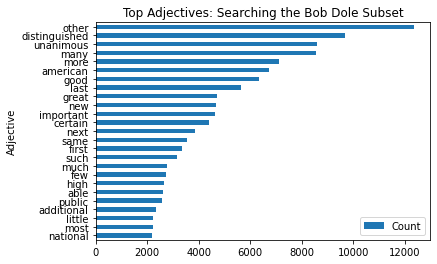

In [43]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = [15, 10]

top_25_adjectives_count_df.sort_values(by=['Count'], inplace=True, ascending=True)

top_25_adjectives_count_df.plot.barh(x = "Adjective", y = "Count",
            title = "Top Adjectives: Searching the Bob Dole Subset")

This visualization isn't great because it contains so many stop words. Let's remove stop words and visualize our data again!

In [49]:
stopwords = ['right', 'hon', 'general', 'mr', 'shall', 'majesty', 'exchequer', 'address', 'motion', 'bill',
             'earl', 'friend', 'chancellor', 'sense', 'object', 'suppose', 'amidst', 'noble', 'lord', 'agree',
             'speech', 'kind', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
             'october', 'november', 'december', 'order', 'held', 'hold', 'assembly', '£', 'humble', 'about', 'above',
             'across', 'address', 'after', 'afterwards', 'again', 'against', 'agree', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'amidst', 'among', 'amongst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anything', 'anyway', 'anywhere', 'april', 'are', 'around', 'as', 'at', 'back', 'be', 'was',
             'becames', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
             'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'do',
             'could', 'did', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'either', 'else', 'elsewhere',
             'empty', 'enough', 'even', 'ever', 'everyone', 'everything', 'everywhere', 'except', 'few', 'first', 'for',
             'from', 'front', 'full', 'further', 'general', 'get', 'give', 'go', 'had', 'has', 'have', 'held', 'hence',
             'here', 'hereby', 'herein', 'hold', 'however', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself',
             'just', 'keep', 'kind', 'last', 'latter', 'least', 'less', 'made', 'make', 'many', 'me', 'meanwhile', 'might',
             'mine', 'more', 'most', 'mostly', 'move', 'much', 'must', 'name,' 'neither', 'never', 'nevertheless', 'next',
             'no', 'noble', 'nobody', 'none', 'nor', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'one', 'once',
             'only', 'onto', 'or', 'other', 'others', 'otherwise', 'out', 'over', 'own', 'part', 'perhaps', 'please', 'put',
             'quite', 'rather', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sense',
             'several', 'shall', 'should', 'show', 'side', 'since', 'so', 'some', 'someone', 'something', 'sometime',
             'still', 'such', 'suppose', 'take', 'than', 'that', 'the', 'then', 'there', 'thereby', 'therefore', 'these',
             'they', 'this', 'those', 'though', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'under',
             'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'when', 'whereby', 'whether', 'which', 'while', 'who', 'why', 'will', 'with', 'within',
             'without', 'would', 'yet', 'bright', 'mr.', 'hansard', 'lancashire', '[]', '£1', '000', 'russell', 'committee',
             'reading', 'learned', 'deal', 'time', 'royal', 'gentlemen', 'gentleman', 'year', 'years', 'affairs', 'affair',
             'academy', 'sir', 'thought', 'took', 'bring', 'brings', 'brought', 'forward', 'great', 'good', 'department',
             'treasury', 'second', 'take', 'taken', 'privy', 'member', 'robert', 'large', 'session', 'secretary', 'notice',
             'moment', 'think', 'believe', 'hope', 'ask', 'hear', 'beg', 'support', 'state', 'find', 'admit', 'wish',
             'refer', 'reply', 'know', 'feel', 'propose', 'understand', 'let', 'allow', 'like', 'receive', 'consider',
             'begin', 'tell', 'like', 'send', 'ought', 'come', 'intend', 'add', 'want', 'stand', 'suggest', 'remind',
             'use', 'mean', 'suggest', 's', 'you', 'this', 'he', 'it', 'they', 'who', 'whole', 'i', 'house', 'she', 
             'man', 'him', 'her', 'them', 'act', 'amendments','table', 'week', 'way', 'day', 'senate', 'little', 'able', 
             'high', 'past', 'necessary', 'long', 'minute', 'today', 'day', 'dear','small','big']

In [50]:
adjectives_no_stopwords = [word for word in lowercase_adjectives if not word in stopwords]

In [51]:
adjectives_no_stopwords[:20]

['96th',
 'net',
 'american',
 'social',
 'independent',
 'substantial',
 'additional',
 'employersponsored',
 'special',
 'pressing',
 'serious',
 '97th',
 'american',
 'tired',
 'limitless',
 'national',
 'permanent',
 'harsh',
 'tiny',
 'upper']

In [52]:
adjectives_count_no_stopwords = countWords(adjectives_no_stopwords)

<AxesSubplot:title={'center':'Top Adjectives Without Stopwords: Searching the Bob Dole Subset'}, ylabel='Adjective'>

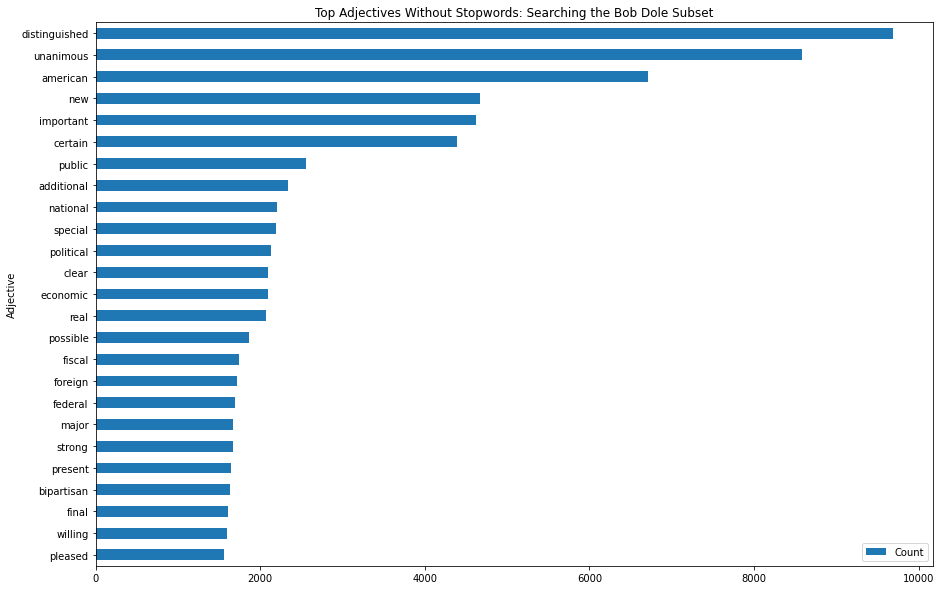

In [53]:
adjectives_count_df_no_stopwords = pd.DataFrame(adjectives_count_no_stopwords.items(),columns = ['Adjective','Count'])

adjectives_count_df_no_stopwords.sort_values(by=['Count'], inplace=True, ascending=False)

top_25_adjectives_count_df_no_stopwords = adjectives_count_df_no_stopwords[:25].copy()

plt.rcParams['figure.figsize'] = [15, 10]

top_25_adjectives_count_df_no_stopwords.sort_values(by=['Count'], inplace=True, ascending=True)

top_25_adjectives_count_df_no_stopwords.plot.barh(x = "Adjective", y = "Count",
            title = "Top Adjectives Without Stopwords: Searching the Bob Dole Subset")

Now it's your turn!

## Section 3: Extracting Parts-of-Speech from the Stanford Congressional Records

In this section we will use spaCy on Bob Dole's Congressional speeches. 

First, import the required modules:

In [56]:
import glob, os, csv, pandas as pd

After importing the modules we want to read in the Stanford Congressional Records. 

Before we can read in the data, however, we should understand how the data is stored. Unlike the __gladstone_speeches__ data, which was conveniently aggregated in a .csv file, the Stanford Congressional Records are scattered across several sub-directories and .txt files. 

To see what I mean, let's look at the file hierarchy for the Stanford Congressional Records:

In [57]:
directory_path_to_congress = "/scratch/group/oit_research_data/stanford_congress"

glob.glob('{}/*'.format(directory_path_to_congress))

['/scratch/group/oit_research_data/stanford_congress/__MACOSX',
 '/scratch/group/oit_research_data/stanford_congress/speakermap_stats',
 '/scratch/group/oit_research_data/stanford_congress/keywords.txt',
 '/scratch/group/oit_research_data/stanford_congress/topic_phrases.txt',
 '/scratch/group/oit_research_data/stanford_congress/congress_download.sh',
 '/scratch/group/oit_research_data/stanford_congress/vocabulary',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily',
 '/scratch/group/oit_research_data/stanford_congress/false_matches.txt',
 '/scratch/group/oit_research_data/stanford_congress/party_full',
 '/scratch/group/oit_research_data/stanford_congress/partisan_phrases',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound',
 '/scratch/group/oit_research_data/stanford_congress/audit']

As shown above, the Stanford Congressional Records includes data from __keywords__ to __partisan_phrases__. 

We are interested in the __hein-daily__ folder, which contains Congressional speech data. We can view the contents of the __hein-daily__ folder by adding it to our directory path. 

The following code shows the first 30 files in __hein-daily__.

In [58]:
directory_path_to_hein_daily = "/scratch/group/oit_research_data/stanford_congress/hein-daily"

glob.glob('{}/*'.format(directory_path_to_hein_daily))[:30]

['/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byparty_2gram_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byparty_2gram_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/107_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/byspeaker_2gram_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/098_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/100_SpeakerMap.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-daily/descr_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/

There are a lot of files in here! And, at first glance many of them seem unrelated. We have files with labels that include: __2_gram__, __SpeakerMap__, __descr___, and __speeches___.

We are just interested in .txt files with the prefix __speeches___ and the prefix __descr___. 

__speeches___ contains the actual speeches recorded in Congress and __descr___ contains associated metadata like the date of the speech and the speaker. 

The following code iterates through each __speeches___ .txt file and each __descr___ .txt file and combines them into pandas DataFrames that resembles our __gladstone_speeches__ data.

> Note: this code takes a few minutes to run. While it runs, it prints lines that were ommitted because of formatting or parsing errors.

In [59]:
directory = '/scratch/group/oit_research_data/stanford_congress/hein-bound/'
file_type = 'txt'
delim ='|'

speeches_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) for f in glob.glob(directory + "speeches_*"+file_type)])

descr_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) for f in glob.glob(directory + "descr_*"+file_type)])

b'Skipping line 207724: expected 2 fields, saw 3\nSkipping line 208494: expected 2 fields, saw 5\n'
b'Skipping line 45205: expected 2 fields, saw 3\nSkipping line 96589: expected 2 fields, saw 3\n'
b'Skipping line 9177: expected 2 fields, saw 3\nSkipping line 9232: expected 2 fields, saw 3\nSkipping line 10391: expected 2 fields, saw 3\nSkipping line 10767: expected 2 fields, saw 3\nSkipping line 19439: expected 2 fields, saw 3\nSkipping line 20135: expected 2 fields, saw 3\nSkipping line 38635: expected 2 fields, saw 3\nSkipping line 46625: expected 2 fields, saw 3\nSkipping line 67408: expected 2 fields, saw 3\nSkipping line 96433: expected 2 fields, saw 3\nSkipping line 111918: expected 2 fields, saw 3\nSkipping line 126420: expected 2 fields, saw 3\nSkipping line 127531: expected 2 fields, saw 3\nSkipping line 142222: expected 2 fields, saw 3\n'
b'Skipping line 7466: expected 2 fields, saw 3\nSkipping line 73461: expected 2 fields, saw 3\nSkipping line 107105: expected 2 fields, sa

Now we have two DataFrames, one with speeches and one with metadata:

In [60]:
speeches_df

,speech_id,speech
0,740000001,The Chair lays before the Senate the credentia...
1,740000002,(John C. Crockett) proceeded to read the certi...
2,740000003,Mr. President. I suggest that credentials foun...
3,740000004,Is there objection to the request? The Chair h...
4,740000005,Secretary of State.
...,...,...
382520,940382525,Mr. Speaker. it is a great personal honor for ...
382521,940382526,Mr. Speaker. given the fact that Chairman MADD...
382522,940382527,Mr. Speaker. taie 94th Congress has officially...
382523,940382528,designateApril 24 as a National Day of Remembr...


In [61]:
descr_df

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,1110000001,H,20090106,1,The CLERK,Unknown,Unknown,Unknown,Special,66,70,01062009.txt,107,16
1,1110000002,H,20090106,2,The CLERK,Unknown,Unknown,Unknown,Special,77,100,01062009.txt,836,134
2,1110000003,H,20090106,3,The CLERK,Unknown,Unknown,Unknown,Special,565,591,01062009.txt,219,37
3,1110000004,H,20090106,4,The CLERK,Unknown,Unknown,Unknown,Special,593,613,01062009.txt,596,92
4,1110000005,H,20090106,5,The CLERK,Unknown,Unknown,Unknown,Special,616,622,01062009.txt,200,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261804,780261805,H,19441219,1345,The SPEAKER pro tempore,Unknown,Unknown,Unknown,Special,35449,35451,12191944.txt,64,11
261805,780261806,H,19441219,1346,Mr. RAMSPECK,Unknown,RAMSPECK,Unknown,M,35489,35492,12191944.txt,102,17
261806,780261807,H,19441219,1347,The SPEAKER pro tempore,Unknown,Unknown,Unknown,Special,35494,35501,12191944.txt,246,37
261807,780261808,H,19441219,1348,Mr. ANDERSON of New York,Unknown,ANDERSON,New York,M,35520,35540,12191944.txt,751,118


For the sake of analysis, let's merge these into a single DataFrame.

The following code merges the two DataFrames by the `speech_id` column (a unique identifier) and also replaces any null values (NAs) with zeros.

In [62]:
all_data = pd.merge(speeches_df, descr_df, on='speech_id').fillna(0)

In [63]:
all_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,740000001,The Chair lays before the Senate the credentia...,S,19350103,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,48,51,01031935.txt,184,32
1,740000002,(John C. Crockett) proceeded to read the certi...,S,19350103,2,The Chief Clerk,Unknown,Unknown,Unknown,Special,52,54,01031935.txt,124,21
2,740000003,Mr. President. I suggest that credentials foun...,S,19350103,3,Mr. ROBINSON,Unknown,ROBINSON,Unknown,M,55,57,01031935.txt,153,30
3,740000004,Is there objection to the request? The Chair h...,S,19350103,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,58,62,01031935.txt,238,44
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394636,940382525,Mr. Speaker. it is a great personal honor for ...,E,19761001,4819,Mr. BIAGGI,Unknown,BIAGGI,Unknown,M,383002,383082,10011976.txt,2782,453
17394637,940382526,Mr. Speaker. given the fact that Chairman MADD...,E,19761001,4820,Mr. PHILLIP BURTON,PHILLIP,BURTON,Unknown,M,383088,383104,10011976.txt,337,60
17394638,940382527,Mr. Speaker. taie 94th Congress has officially...,E,19761001,4821,Mr. JOHNSON of California,Unknown,JOHNSON,California,M,383111,383127,10011976.txt,586,102
17394639,940382528,designateApril 24 as a National Day of Remembr...,E,19761001,4822,For.-......To,Unknown,......TO,Unknown,M,383248,383342,10011976.txt,6066,892


`all_data` is a large DataFrame. To make analysis more accessible, let's take a subset of the data.

A subset is a portion of the data made up of criteria of our choosing. The following code takes a subset of just speeches by Mr. Dole.

In [64]:
bob_dole = all_data[(all_data.speaker == "Mr. DOLE")].copy()

In [65]:
bob_dole

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
617680,970000180,Mr. President. despite all the debate over tax...,S,19810105,180,Mr. DOLE,Unknown,DOLE,Unknown,M,3410,3425,01051981.txt,602,107
617687,970000187,Mr. President. I send to the desk a bill to cl...,S,19810105,187,Mr. DOLE,Unknown,DOLE,Unknown,M,6423,6427,01051981.txt,147,25
617689,970000189,Mr. President. today I am introducing legislat...,S,19810105,189,Mr. DOLE,Unknown,DOLE,Unknown,M,6880,6890,01051981.txt,409,60
617690,970000190,Mr. President. one of the most pressing and se...,S,19810105,190,Mr. DOLE,Unknown,DOLE,Unknown,M,7015,7022,01051981.txt,297,47
617692,970000192,Mr. President. the Senator from Kansas today w...,S,19810105,192,Mr. DOLE,Unknown,DOLE,Unknown,M,7582,7662,01051981.txt,2657,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17392087,940379976,Mr. President. I rise to pay tribute to the re...,S,19761001,2270,Mr. DOLE,Unknown,DOLE,Unknown,M,161175,161210,10011976.txt,1285,222
17392088,940379977,Mr. President. I am particularly appreciative ...,S,19761001,2271,Mr. DOLE,Unknown,DOLE,Unknown,M,161212,161247,10011976.txt,1294,217
17392089,940379978,Mr. President. HIRAM FONG comes from what is g...,S,19761001,2272,Mr. DOLE,Unknown,DOLE,Unknown,M,161249,161280,10011976.txt,1161,180
17392090,940379979,Mr. President. the retirement of Senator JOHN ...,S,19761001,2273,Mr. DOLE,Unknown,DOLE,Unknown,M,161282,161319,10011976.txt,1403,229


Let's look at some of the obvious differences between `bob_dole` and `all_data`. For one, `all_data` consists of 17,394,641 rows whereas `bob_dole` has 49,119. This difference in size will make working with `bob_dole` much easier! 

Now let's make processing the `bob_dole` data easier for spaCy. The following code creates a pandas series from just Dole's speeches. A series is lighter weight than a formatted DataFrame.

In [66]:
bob_dole_set = bob_dole['speech'].copy()

In [67]:
bob_dole_set

617680      Mr. President. despite all the debate over tax...
617687      Mr. President. I send to the desk a bill to cl...
617689      Mr. President. today I am introducing legislat...
617690      Mr. President. one of the most pressing and se...
617692      Mr. President. the Senator from Kansas today w...
                                  ...                        
17392087    Mr. President. I rise to pay tribute to the re...
17392088    Mr. President. I am particularly appreciative ...
17392089    Mr. President. HIRAM FONG comes from what is g...
17392090    Mr. President. the retirement of Senator JOHN ...
17392091    Mr. President. the adjournment of this session...
Name: speech, Length: 49119, dtype: object

The number on the left is an index, a unique numerical representation of a sentence's location, and the text on the right are Dole's speeches.

We can now run `nlp.pipe()` on the data. `bob_dole` is a larger variable than `gladstone_speeches`, so it will take longer to run.

Earlier we glossed over the `%%time` magic command. 

Our `%%time` magic command tells us how long a cell took to complete. The output of `%%time` consists of: user time, system time, and total time. System time is the amount of time the compuer used to calculate results. User time refers to the amount of time we spent waiting to compute. If lots of other processes are running on M2 we might have to wait longer to process our code.

In [68]:
%%time
bob_dole_doc = list(nlp.pipe(bob_dole_set, disable = ["ent"]))

CPU times: user 7min 37s, sys: 2min 9s, total: 9min 47s
Wall time: 9min 47s


Now it's your turn.

## Assignment

From Bob Dole's speeches:
 - extract words and their lemmatized forms
 - extract words and their parts-of-speech
 - extract nouns
 - extract adjectives
 - extract verbs (our examples only extracted adjectives and nouns, but can you extract verbs?)
 - extract subjects
 - extract objects (this will require following the link to the spaCy documentation and seeing for yourself how objects are tagged--hint: you need to find the tags for direct, indirect, and passive objects)

After extracting these different parts-of-speech and syntactic units, choose three of these variables and: 
 - count the number of unique occurances
 - visualize your count (remember to remove stop words where necessary)
 
Make a few observations about your visualizations:
 - note three things you notice (this can be as simple as "Dole often uses the verb X")
 - note three ways you could build a more sophisticated analyis from your results (for example, "I could read the debates and contextualize Dole's use of the word X")


<font color=blue>For this assingment to be considered complete you should turn in your Notebook with a) each of the extracted parts-of-speech and syntactic units (show them with __variable_name[:30]__, b) your three visulizations, and c) your observations.</font>